In [1]:
import pandas as pd
import geopandas

In [2]:
df = pd.read_csv('data/ramen-ratings.csv')
df.loc[df['Country'] == 'United States', 'Country'] = 'United States of America'

df.head()

,Review #,Brand,Variety,Style,Country,Stars
0,1,Westbrae,Miso Ramen,Pack,United States of America,0.5
1,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0
2,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
4,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5


<AxesSubplot: >

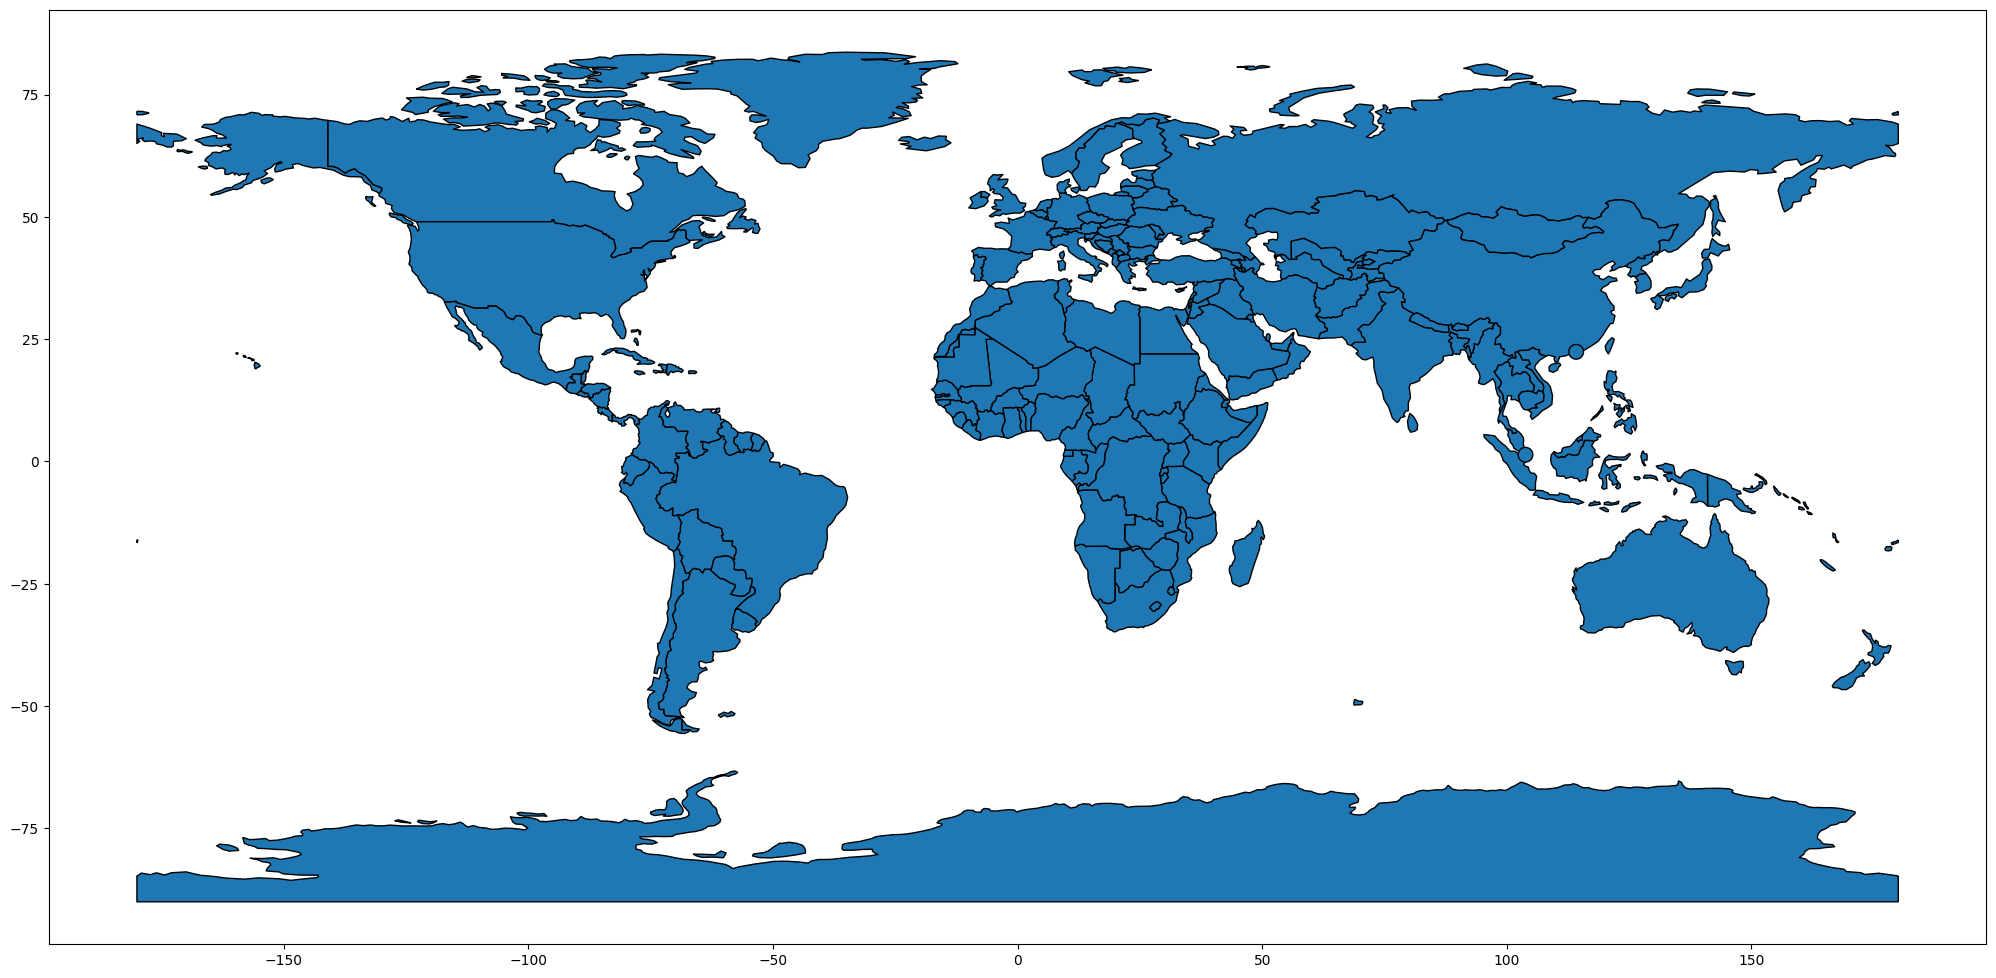

In [3]:
from shapely.geometry import Point

world: pd.DataFrame = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres'))

point = Point(103.804906, 1.373388).buffer(1.5)
world = pd.concat([world, pd.DataFrame({"name": ["Singapore"], "geometry": [point]})])

point = Point(114.165247, 22.409866).buffer(1.5)
world = pd.concat([world, pd.DataFrame({"name": ["Hong Kong"], "geometry": [point]})])

world.plot(edgecolor='black', figsize=(25, 25))

Style                     Bar  Bottle   Bowl   Box  Can    Cup   Pack  \
Country                                                                 
Australia                 NaN     NaN    3.0   NaN  NaN   17.0    5.0   
Bangladesh                NaN     NaN    NaN   NaN  NaN    NaN   12.0   
Brazil                    NaN     NaN    NaN   NaN  NaN    2.0   22.0   
Cambodia                  NaN     NaN    NaN   NaN  NaN    NaN    5.0   
Canada                    NaN     NaN   12.0   NaN  NaN   20.0   24.0   
China                     NaN     NaN   78.0  16.0  NaN   63.0  132.0   
Colombia                  NaN     NaN    NaN   NaN  NaN    3.0    3.0   
Estonia                   NaN     NaN    NaN   NaN  NaN    NaN    2.0   
Fiji                      NaN     NaN    NaN   NaN  NaN    NaN    4.0   
Finland                   NaN     NaN    NaN   NaN  NaN    NaN    3.0   
France                    NaN     NaN    NaN   NaN  NaN    4.0    2.0   
Germany                   NaN     NaN    NaN   NaN 

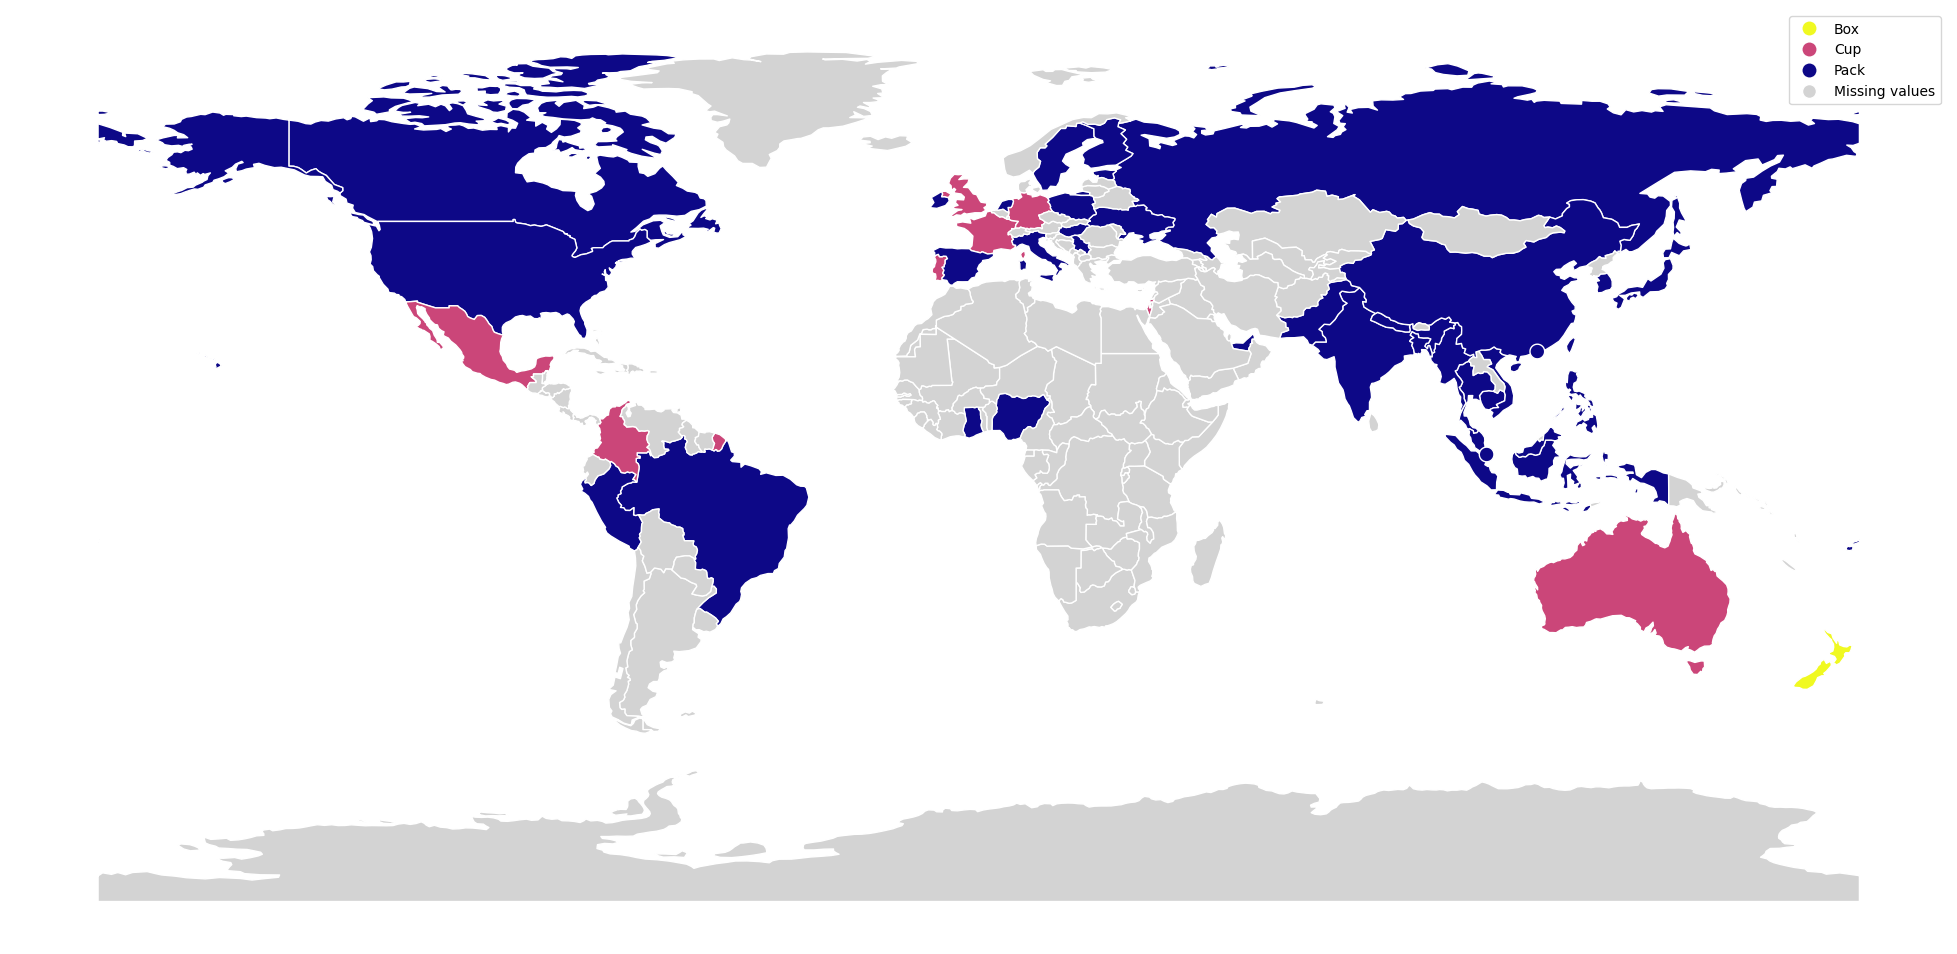

In [38]:
merged = df.merge(world,left_on="Country", right_on="name", how="left")

by_variety = merged.groupby(by=['Country', 'Style']).count().copy()['Brand'].unstack(1)
# .merge(world, left_on='Country', right_on='name')
by_variety['Max'] = by_variety.idxmax(axis=1)
by_variety = by_variety['Max'].to_frame().reset_index()
world_with_color = world.merge(by_variety, left_on='name', right_on='Country', how='left')
"""
supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r',
'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r',
'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r',
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1',
'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn',
'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples',
'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu',
'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2',
'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r',
'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r',
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r',
'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix',
'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg',
'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray',
'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet',
'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean',
'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r',
'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer',
'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r',
'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight',
'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r',
'winter', 'winter_r'
"""

# Plot by most common variety

world_with_color
world_with_color.plot(
    column='Max',
    cmap='plasma_r',
    legend=True,
    figsize=(25,25),
    edgecolor='white',
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
).set_axis_off()

In [5]:
pd.set_option('display.max_rows', 500)
geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))['name']

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
5                    Kazakhstan
6                    Uzbekistan
7              Papua New Guinea
8                     Indonesia
9                     Argentina
10                        Chile
11              Dem. Rep. Congo
12                      Somalia
13                        Kenya
14                        Sudan
15                         Chad
16                        Haiti
17               Dominican Rep.
18                       Russia
19                      Bahamas
20                 Falkland Is.
21                       Norway
22                    Greenland
23       Fr. S. Antarctic Lands
24                  Timor-Leste
25                 South Africa
26                      Lesotho
27                       Mexico
28                      Uruguay
29                       Brazil
30                      Bolivia
31      

In [64]:
print(df)

merged = df.merge(world,left_on="Brand", right_on="name", how="left")
print(merged)
by_rating = merged.groupby(["Brand"]).mean(["Stars"]).sort_values(by=["Stars"])


by_rating

      Review #         Brand  \
0            1      Westbrae   
1            2       Wai Wai   
2            3       Wai Wai   
3            4       Wai Wai   
4            5         Vifon   
...        ...           ...   
4295      4296         Paldo   
4296      4297      Kikkoman   
4297      4298  Li Xiao Mien   
4298      4299       Sau Tao   
4299      4300      Maruchan   

                                                Variety Style  \
0                                            Miso Ramen  Pack   
1                                  Tom Yum Chili Flavor  Pack   
2                                        Tom Yum Shrimp  Pack   
3                        Oriental Style Instant Noodles  Pack   
4     Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...  Bowl   
...                                                 ...   ...   
4295                           Teumsae Stir Fried Ramen  Bowl   
4296                 Spicy Garlic Noodle Kit With Sauce   Box   
4297                          

,Review #,Stars,pop_est,gdp_md_est
Brand,,,,
Kim Ve Wong,43.0,0.0,NaN,NaN
Isoyama Shoji,2631.0,0.0,NaN,NaN
Tiger,293.0,0.0,NaN,NaN
Bowlfull,3094.5,0.0,NaN,NaN
Hsin Tung Yang,498.0,0.0,NaN,NaN
...,...,...,...,...
Seven & i,3453.0,5.0,NaN,NaN
Himawari-Shokuhin,3304.0,5.0,NaN,NaN
Base Foods,3433.0,NaN,NaN,NaN


In [65]:
import matplotlib.pyplot as plt
plt.close("all")

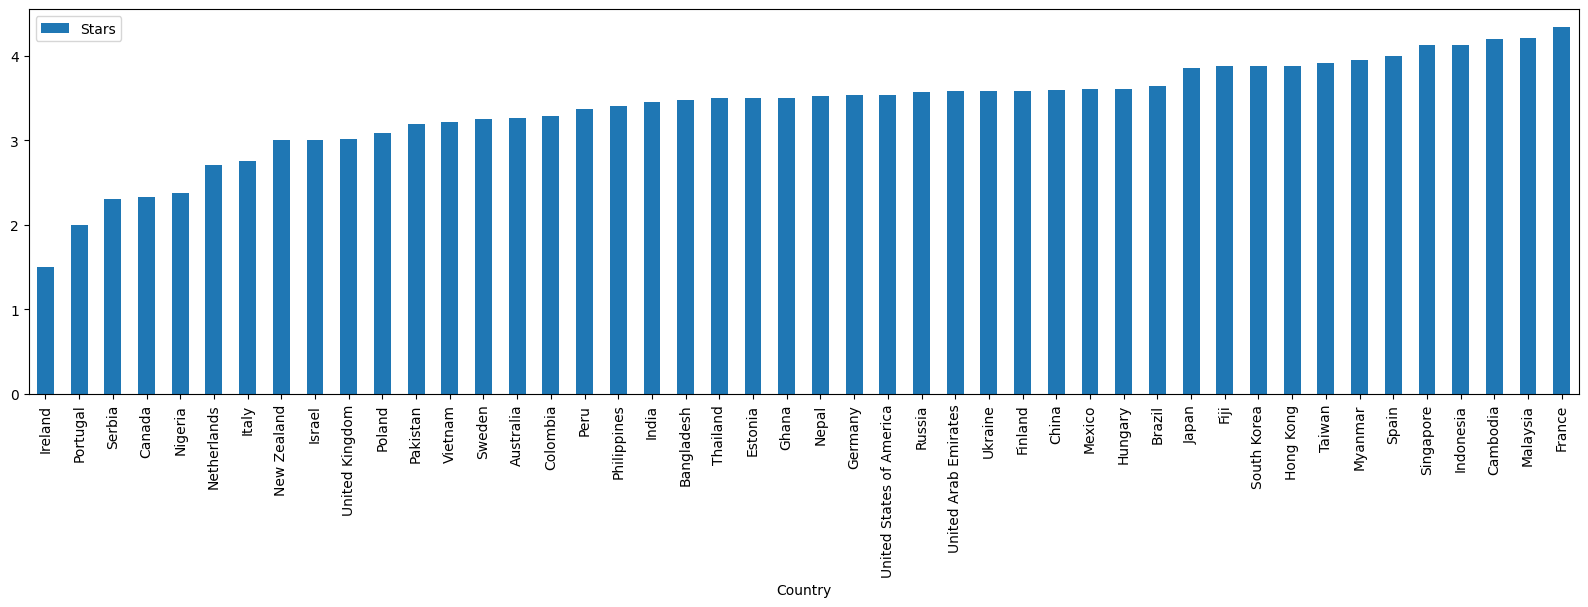

In [75]:
by_country = merged.groupby(["Country"]).mean(["Stars"]).sort_values(by=["Stars"])
tr = by_country.plot(y="Stars", kind="bar", figsize=(20,5))

      Review #           Brand                                       Variety  \
579        580          Baijia       Hot & Sour Casserole Stewed Rice Noodle   
292        293           Tiger                      Onion Flaver Rice Noodle   
1781      1782  Western Family                  Beef Flavour Instant Noodles   
1794      1795           Azami                   Kimchee Flavour Noodle Soup   
2526      2527   Uni-President                               Mushroom Flavor   
...        ...             ...                                           ...   
2640      2641       Nanoblock                                   Ramen Bokki   
3148      3149        Hakubaku                                     Baby Udon   
3149      3150        Hakubaku                                    Baby Somen   
3432      3433      Base Foods                                  Base Noodles   
4185      4186   Shoo Long Kan  Hot Pot Vermicelli Hot and Sour Rice Noodles   

     Style                   Country  S

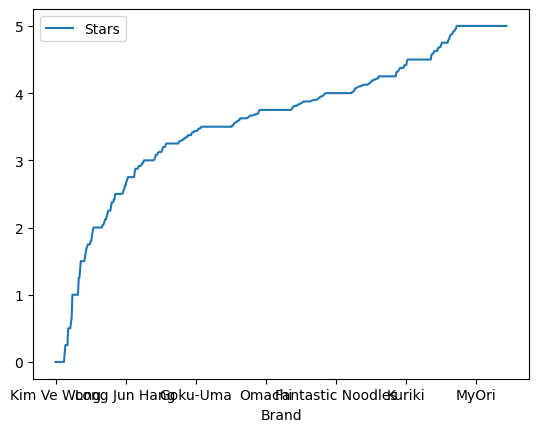

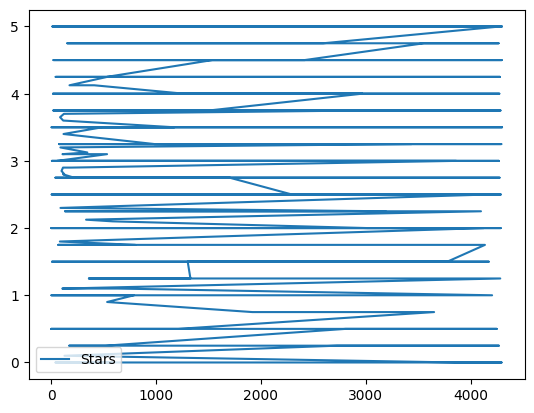

In [71]:
m  = merged.sort_values(by=["Stars"])
print(m)
ts = by_rating.plot(y="Stars")
tt = m.plot(y="Stars")

In [92]:
canada_index = merged["Country"] == "Canada"
canada_ramen = merged[canada_index].sort_values(by="Stars")
worst = canada_ramen[:10][["Brand", "Variety", "Style", "Stars"]]
best = canada_ramen[-11:][["Brand", "Variety", "Style", "Stars"]]
print(best)
print(worst)


                                        Variety  Stars Style
2015      Chicken Style Noodles With Vegetables   3.50   Cup
2012                   Beef Style Ramen Noodles   3.50  Pack
1706            Hot & Spicy Flavour Noodle Soup   3.50  Bowl
1103            Instant Noodles Chicken Flavour   3.50  Pack
2957                Kimchee Flavour Noodle Soup   3.75  Bowl
3075          Chili Chicken Flavour Noodle Soup   3.75  Bowl
3223          Chili Chicken Flavour Noodle Soup   4.00   Cup
2072                        Spicy Ramen Noodles   4.00  Pack
2996                      Chili Seafood Flavour   4.25  Pack
1548  Chow Mein Japanese Style Noodles Yakisoba   5.00  Pack
1340        Cuisine Adventures Chicken Pho Soup   5.00  Bowl
                                                Variety  Stars Style
3216                   Beef Flavour Instant Noodle Soup   0.00   Cup
2971              Vegetable Flavour Instant Noodle Soup   0.00  Pack
2719             Pho Noodle Soup Simulated Beef Flavour   0.0